In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nums_col = df.select_dtypes(include = np.number).columns
df[nums_col] = scaler.fit_transform(df[nums_col])

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [8]:
X = df.iloc[:,: -1]
y = df.target

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size =0.30 , random_state = 42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10,random_state = 42)

In [11]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [12]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8131868131868132
0.8367346938775511
0.82
0.8282828282828283


In [17]:
feature_importances = classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
top_features = X.columns[indices[:5]]
top_features

Index(['ca', 'cp', 'thalach', 'oldpeak', 'thal'], dtype='object')

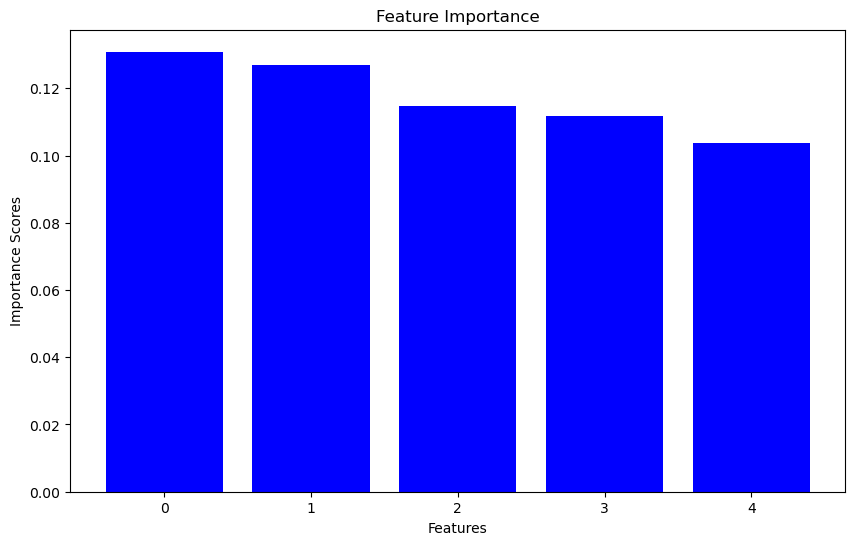

In [18]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.bar(range(len(indices[:5])),feature_importances[indices[:5]],color='b',align='center')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [50,100,150],
    'max_depth' : [5,10,15],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

grid_search = GridSearchCV(classifier , param_grid = param_grid , cv = 5,scoring = 'accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [21]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.839424141749723


In [22]:
print(accuracy_score(y_test,y_pred))  # Default model
print(accuracy_score(y_test , best_model.predict(X_test)))   # tuned model

0.8131868131868132
0.8351648351648352
